## TD N°2 explicabilité du dataset Boston Housing

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Créer un modèle baseline linéaire et random forest

4) Interpréter le modèle linéaire

5) Tuner votre random forest

6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

6) Réaliser une explicabilité par individu
   1) En utilisant la méthode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une prédiction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la prédiction)

7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de données couramment utilisé en apprentissage automatique et en statistique pour étudier les relations entre diverses caractéristiques socio-économiques et immobilières dans la ville de Boston.  
Il contient des informations sur des propriétés résidentielles et leur environnement, et est souvent utilisé pour prédire la valeur des maisons, un problème classique de régression.


**Variable dispo**: 
- CRIM : taux de criminalité par habitant par ville
- ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pièces par logement
- AGE : proportion des unités occupées par leur propriétaire et construites avant 1940
- DIS : distances pondérées vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilité aux autoroutes radiales
- TAX : taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio élèves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-économique inférieur
- MEDV : valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars) - **variable cible**

In [1]:
#Web request
import requests
import io
import pandas as pd
import numpy as np

### 1) Charger le dataset bostong_housing

In [56]:
#Télécharge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

In [57]:
df = df.drop("Unnamed: 0", axis=1)

In [58]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


### 2)Nettoyer votre jeu de données pour créer une régression linéaire et un random forest

Penser à :

- Vérifier comment encoder vos variables qualitatives pour la modélisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corrélations

>Tester d'ajouter des features log, quadratique, ...

Les valeurs manquantes :

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Il n'y a pas de valeur manquantes dans le jeu de données.

Les types : 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


La variable CHAS est qualitative mais encodée sous forme binaire. 
De plus la variable RAD, qualitative et ordonnée, est déjà encodée.

Les distributions des variables :

In [59]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

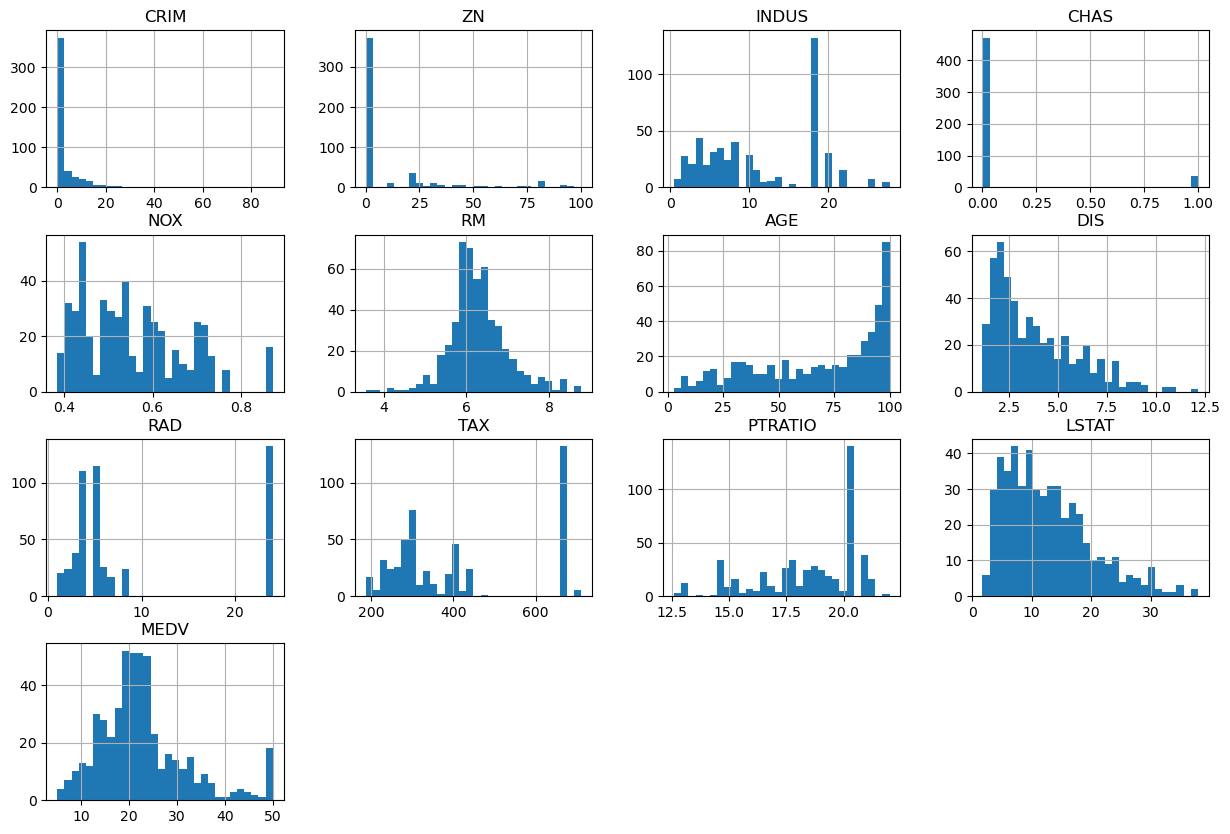

In [7]:
df.hist(bins=30, figsize=(15, 10))

Concernant la distribution de la variable cible : MEDV, on observe qu'elle est comprise entre 5 et 50 milliers de dollars. La plupart des observation sont comprises entre 10 et 25 miliers de dollars mais il est à noter que des observations avec les valeurs les plus importantes, extrèmes, sont également présentes.

A propos des variables explicatives quantitatives hormis TAX, on peut noter que l'ensemble de leurs distributions ne semblent pas suivre une loi normale. Ces dernières présentent en effet de nombreuses valeurs extrèmes ainsi que des distribution asymétriques.

De plus, dans la variable CHAS, on constate la présence d'une répartition très déséquilibrée entre les catégories 0 et 1.

Les corrélations : 

In [8]:
corr = df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,0.534423,-0.562411


La variable NOX présente une corrélation supérieure à 0,85 en valeur absolue avec la variable DIS, ainsi que 3 autres corrélation proches de 0,80. 

Aussi afin d'éviter la présence de multicolinéarité dans le jeu de données, cette variable est retirée.

In [9]:
df = df.drop("NOX", axis=1)

Séparation des données : 

A présent, on sépare le jeu de données en un jeu d'entraînement et de test, et on distingue également la variable cible des autres variables

In [10]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,:11],  
                                                    df['MEDV'], 
                                                    test_size=0.3 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )

In [11]:
X_train

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
5,0.02985,0.0,2.18,0,6.430,58.7,6.0622,3,222.0,18.7,5.21
116,0.13158,0.0,10.01,0,6.176,72.5,2.7301,6,432.0,17.8,12.04
45,0.17142,0.0,6.91,0,5.682,33.8,5.1004,3,233.0,17.9,10.21
16,1.05393,0.0,8.14,0,5.935,29.3,4.4986,4,307.0,21.0,6.58
468,15.57570,0.0,18.10,0,5.926,71.0,2.9084,24,666.0,20.2,18.13
...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,5.836,91.9,2.2110,5,384.0,20.9,18.66
270,0.29916,20.0,6.96,0,5.856,42.1,4.4290,3,223.0,18.6,13.00
348,0.01501,80.0,2.01,0,6.635,29.7,8.3440,4,280.0,17.0,5.99
435,11.16040,0.0,18.10,0,6.629,94.6,2.1247,24,666.0,20.2,23.27


Winsorisation :

Afin que des outliers ne perturbent pas les modélisations qui seront réalisées, on winsorize les X_train et X_test.

In [12]:
def winsorize_data(xtrain, xtest, feature):

    """_summary_

    Fonction permettant de winsorizez un jeu d'entrainement et de test en calculant
    les quantiles sur le jeu d'entrainement et l'appliquant sur le jeu test.

    Pour se prémunir d'un data leak.
    
    """
    
    # Définir les quantiles sur xtrain
    lower_quantile = 0.05  # 5% quantile
    upper_quantile = 0.95  # 95% quantile

    # Calcul des bornes à partir des quantiles sur xtrain
    lower_bound = np.quantile(xtrain[feature], lower_quantile)
    upper_bound = np.quantile(xtrain[feature], upper_quantile)

    # Appliquer la winsorisation sur xtrain
    xtrain_winsorized = np.clip(xtrain[feature], lower_bound, upper_bound)

    # Appliquer les mêmes bornes sur xtest
    xtest_winsorized = np.clip(xtest[feature], lower_bound, upper_bound)

    return(xtrain_winsorized, xtest_winsorized)

In [51]:
#Winsorize outliers
for col in X_train.columns:
    print(f" winsorization de la variable : {col}") 
    X_train[col], X_test[col] = winsorize_data(xtrain= X_train, xtest= X_test, feature=col)

 winsorization de la variable : CRIM
 winsorization de la variable : ZN
 winsorization de la variable : INDUS
 winsorization de la variable : CHAS
 winsorization de la variable : RM
 winsorization de la variable : AGE
 winsorization de la variable : DIS
 winsorization de la variable : RAD
 winsorization de la variable : TAX
 winsorization de la variable : PTRATIO
 winsorization de la variable : LSTAT


Standardisation :

On standardise également les données des variables explicatives afin de comparer leurs impacts.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)
X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns, index=X_test.index)

### 3)Créer 2 modèles baseline, linéaire et random forest

In [15]:
from sklearn.linear_model import  LinearRegression

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr = lr.predict(X_train_sc)
mse = mean_squared_error(y_train, y_pred_lr)
r2 = r2_score(y_train, y_pred_lr)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 22.736492599582782
R^2 Score: 0.7413266172025459


Sur le jeu d'entraînement, le modèle de régression linéaire permet d'expliquer 74 % de la variance des données.

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
        random_state=42
    )

rf.fit(X_train_sc, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred_rf = rf.predict(X_train_sc)
mse = mean_squared_error(y_train, y_pred_rf)
r2 = r2_score(y_train, y_pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.061692983050848
R^2 Score: 0.9765440911398391


Sur le jeu d'entraînement, le modèle de forêt aléatoire permet d'expliquer 98 % de la variance des données.

### 4) Interpréter le modèle linéaire
Utiliser les méthodes intrinsèques du modèle pour l'interprétation

In [19]:
import statsmodels.api as sm
X_train_sc_cst = sm.add_constant(X_train_sc)
lr2 = sm.OLS(y_train,X_train_sc_cst).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     89.10
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           2.29e-93
Time:                        12:22:45   Log-Likelihood:                -1055.2
No. Observations:                 354   AIC:                             2134.
Df Residuals:                     342   BIC:                             2181.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0158      0.258     89.264      0.0

Selon le modèle de régression linéaire sur le jeu d'entraînement, la valeur médiane des maisons occupées par leur propriétaire est impactée de façon significative par 8 des variables étudiées ainsi qu'une constante. 

L'estimation de la constante est de 23,02 milliers de dollars et cette dernière est significative au seuil de risque de 1 %.

A un même seuil de risque, on retrouve également les distances pondérées vers cinq centres d'emploi de Boston, le ratio élèves-enseignants par ville et le pourcentage de la population de statut socio-économique inférieur qui impactent négativement la variable cible mais aussi la proximité de la rivière Charles et le nombre moyen de pièces par logement qui impactent de façon positive l'estimation de la valeur médiane des maisons.

De plus,  le modèle montre, au seuil de rique de 5 %, une relation positive entre l'indice d'accessibilité aux autoroutes radiales et la variable cible et une relation négative de celle-ci avec le taux de criminalité par habitant par ville.  Au seuil de rique de 10 %, il existe également une relation négative entre le taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars et la variable étudiée.

Concernant l'ampleur de ces impacts, les plus importants sont ceux :
 - du pourcentage de la population de statut socio-économique inférieur (-4,37)
 - du nombre moyen de pièces par logement (3,11)
 - et des distances pondérées vers cinq centres d'emploi de Boston (-2,42)
 
Ce modèle permet d'expliquer 74 % de la variance de la valeur médiane des maisons occupées par leur propriétaire dans le jeu d'entraînement.

In [20]:
y_pred = lr.predict(X_test_sc)
MSE_lr = mean_squared_error(y_test, y_pred)
R2_lr = r2_score(y_test, y_pred)
print("MSE : ",MSE_lr, "   R² : ",R2_lr)

MSE :  21.7144744594351    R² :  0.708581769500404


En utilisant ce modèle sur le jeu de test, on constate qu'il permet d'expliquer 71 % de la variance.

### 5) Tuner votre random forest

Afin d'améliorer le modèle de forêt aléatoire, on a la possibilité de faire varier les paramètres du modèles. Pour cela, utiliser un gridRandom est intéressant.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

parameter_grid = {
    'max_depth': (1, 5, 10),
    'min_samples_split': (2, 4, 8),
    'min_samples_leaf': (1,2,3,5),
    'max_features': (None, 'sqrt', 'log2'),
    'n_estimators': (200, 300, 500, 700),
}

gridRandom = RandomizedSearchCV(estimator=RandomForestRegressor(),
                param_distributions=parameter_grid,
                n_iter=72,
                cv=5,
                n_jobs=-1,
                verbose=1)

In [26]:
#visualisation des résultats
gridRandom.fit(X_train_sc, y_train)

print(gridRandom.best_score_) # Meilleur score
print(gridRandom.best_params_) # Meilleurs paramètres

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.8341489753736997
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [27]:
rf_2 = RandomForestRegressor(
        random_state = 42,
        n_estimators = 500,
        min_samples_split = 2,
        min_samples_leaf = 1,
        max_features = 'sqrt',
        max_depth = 10       
    )

rf_2.fit(X_train_sc, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [28]:
y_pred_rf_2 = rf_2.predict(X_train_sc)
mse = mean_squared_error(y_train, y_pred_rf_2)
r2 = r2_score(y_train, y_pred_rf_2)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.012176356851671
R^2 Score: 0.9771074424636002


Les paramètres retenus grâce au gridRandom ont permis d'améliorer de R² Score et de diminuer le MSE sur le je d'entraînement.

In [29]:
y_pred_rf_2 = rf_2.predict(X_test_sc)
mse = mean_squared_error(y_test, y_pred_rf_2)
r2 = r2_score(y_test, y_pred_rf_2)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13.12954615169349
R^2 Score: 0.8237954543207106


En utilisant ce modèle sur le jeu de test, on obtient un R² de 82 % supérieur à celui obtenu avec le modèle de régression linéaire ainsi qu'un MSE plus faible de 13,13.

### 6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

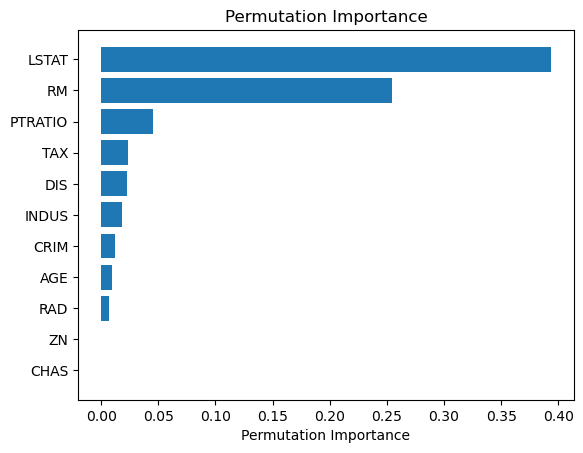

In [30]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_importance = permutation_importance(rf_2, 
                                         X_test_sc, y_test,
                                         n_repeats=10,
                                         random_state=42,
                                         n_jobs=-1)

sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance")
plt.show()

Selon le modèle de forêt aléatoire, les variables les plus importantes dans l'estimation de la valeur médiane des maisons occupées par leur propriétaire sont le pourcentage de la population de statut socio-économique inférieur et le nombre moyen de pièces par logement.

Ces deux variables étaient déjà les 2 plus importantes dans le modèle de régression linéaire, mais il est à noter que les distances pondérées vers cinq centres d'emploi de Boston qui était une variable importante dans le modèle précédent l'est bien moins dans le modèle de forêt aléatoire.

### 7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

1.ICE

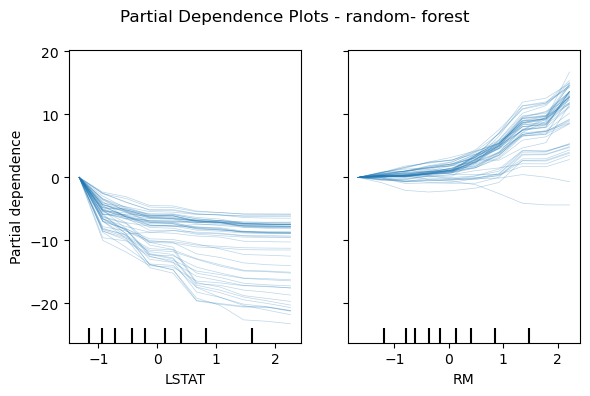

In [48]:
from sklearn.inspection import PartialDependenceDisplay

# ICE pour plusieurs caractéristiques quantitatives
features = ['LSTAT', 'RM']  # Index des caractéristiques


_, ax1 = plt.subplots(figsize = (6,4))
PartialDependenceDisplay.from_estimator(rf_2,  #votre modèle
                                         X_train_sc, 
                                         features,
                                         kind="individual", # On modifie ICI
                                         ax = ax1,
                                         grid_resolution=10, # Nombre de points estimés pour le tracer de la courbe
                                         n_cols=3,
                                         subsample=0.15, # 15% du jeu de données
                                         centered=True
                                         )
plt.suptitle("Partial Dependence Plots - random- forest")
plt.tight_layout()
plt.show()

Dans l'ICE de LSTAT, on observe des similarités dans l'allure des courbes, mais cela est davantage visible dans l'ICE de RM. Cela témoigne de la bonne réprésentativité du PDP pour les variables importantes du modèle.

2. LIME

In [36]:
X_train_sc

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
5,-0.593075,-0.516425,-1.325452,-0.281546,0.170744,-0.386181,1.186661,-0.754516,-1.130703,0.171242,-1.074468
116,-0.570795,-0.516425,-0.156114,-0.281546,-0.251992,0.125408,-0.499226,-0.405215,0.147489,-0.259704,-0.033873
45,-0.562038,-0.516425,-0.619070,-0.281546,-1.074165,-1.309267,0.700035,-0.754516,-1.063750,-0.211821,-0.312686
16,-0.368064,-0.516425,-0.435381,-0.281546,-0.653093,-1.476089,0.395552,-0.638083,-0.613339,1.272548,-0.865740
468,2.823800,-0.516425,1.052053,-0.281546,-0.668071,0.069801,-0.409015,1.690590,1.571760,0.889485,0.893978
...,...,...,...,...,...,...,...,...,...,...,...
106,-0.562086,-0.516425,-0.372658,-0.281546,-0.817860,0.844599,-0.761867,-0.521649,-0.144669,1.224665,0.974727
270,-0.533961,0.420244,-0.611603,-0.281546,-0.784574,-1.001572,0.360338,-0.754516,-1.124616,0.123359,0.112389
348,-0.593075,3.078042,-1.333292,-0.281546,0.511929,-1.461261,2.075467,-0.638083,-0.777678,-0.642767,-0.955630
435,1.853323,-0.516425,1.052053,-0.281546,0.501943,0.944693,-0.805530,1.690590,1.571760,0.889485,1.677091


In [32]:
import lime
import lime.lime_tabular

#Création de l'explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_sc.to_numpy(),  # Attention au format numpy array obligatoire
                                                   feature_names=X_train_sc.columns , #Nom des features du modèle
                                                   class_names=['MEDV']  , #Variable à predire
                                                   verbose=True,
                                                     mode='regression' # Classification ou régression
                                                     )
# Index de l'individu à prédire
i = 468
# Résultat de l'explainer
exp = explainer.explain_instance(X_train_sc.loc[i], rf_2.predict, num_features=5)

C:\Users\Marie\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 25.895799910907932
Prediction_local [17.29293473]
Right: 17.546393522292203


In [33]:
exp.show_in_notebook(show_table=True)

Avec le LIME, on cherche à comprendre la prédiction réalisée pour la valeur médiane de la propriété résidentielle 468.

Cette prédiction est de 17,55, et on peut voir que se sont les valeurs prises par les variables LSTAT, RM, CRIM, TAX et PTRATIO, dans des intervalles spécifiques qui en sont à l'origine.

3. SHAP watterfall plot

In [34]:
# Importer la librairie Shap
import shap 

# Définir le module explainer de Shap, attention ce n'est pas le même si c'est un modèle basé sur des abres

explainer = shap.TreeExplainer(rf_2)

# On calcule les shap values, attention c'est très couteux en temps de calcul.
# On prend donc un échantillon

shap_values = explainer(X_train_sc)

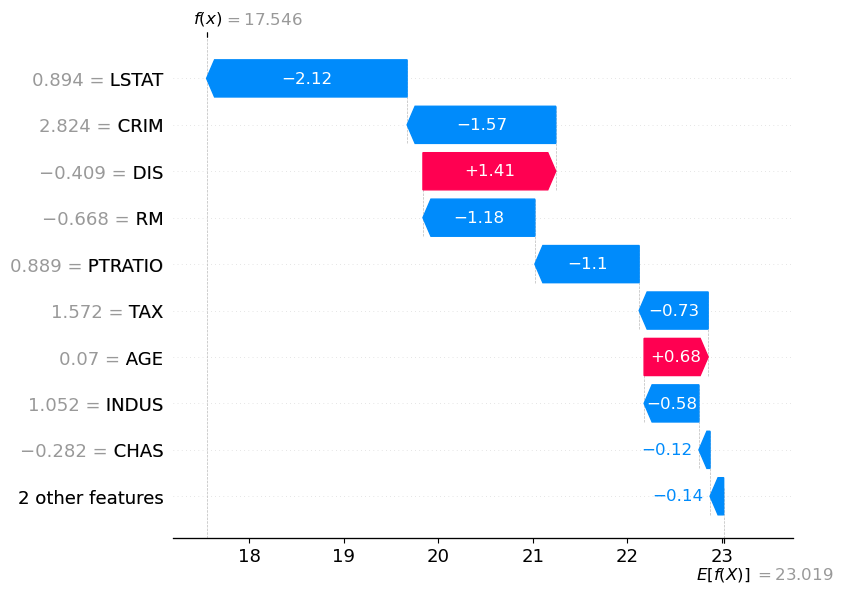

In [35]:
shap.initjs()
# visualize the first prediction's explanation
shap.waterfall_plot(shap_values[4]) # i = 468

Avec ce graphique, nous pouvons pouvons, visualiser les effets individuelles de chaque variable pour la propriété résidentielle 468.

La valeur prédite de 17,55 milliers de dollars pour valeur médiane des maisons occupées par leur propriétaire diffère de la moyenne de 5,47 milliers de dollars.

La variable standardisée de LSTAT (0,894) contribue à diminuer la prédiction de 2,12 milliers de dollars et celle de CRIM (2,824) de 1,57 milliers de dollars. En revanche la valeur standardisée de DIS (-0,409) améliore la prédiction de 1,41 milliers de dollars.

### 8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

1. beeswarm

En moyennisant les résultats individuels, on peut avoir une vision d'ensemble du modèle pour l'interpréter de façon globale.

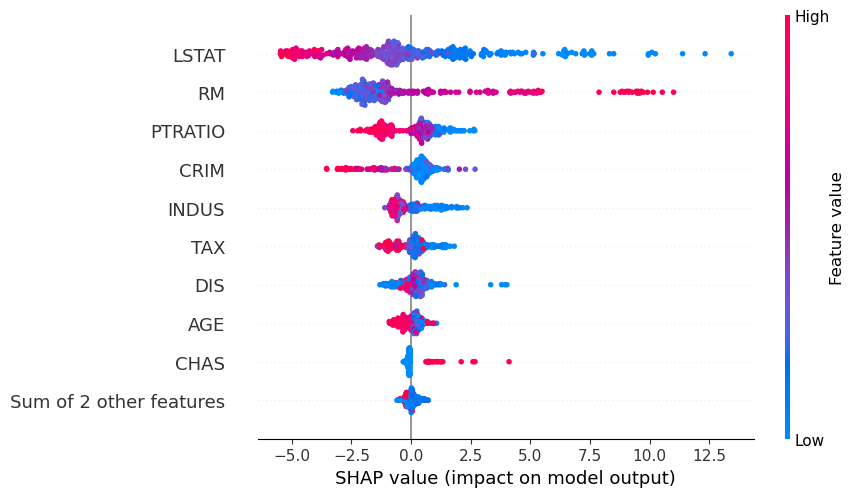

In [37]:
#Graphique beeswarm, interprétabilité globale 
shap.plots.beeswarm(shap_values)

Ce graphique met en avant les variables les plus importantes à l'échelle globale à commencer par LSTAT et RM.

Concernant LSTAT, on constate que la variable évolue principalement dans le sens contraire à la variable cible avec des valeurs de feature élevées. RM évolue également principalement dans le sens contraire à la variable cible mais avec des valeurs de feature faibles.

2. scatter

Nous nous intéressons ici à l'effet d'une variable : LSTAT puis RM, sur la variable cible 

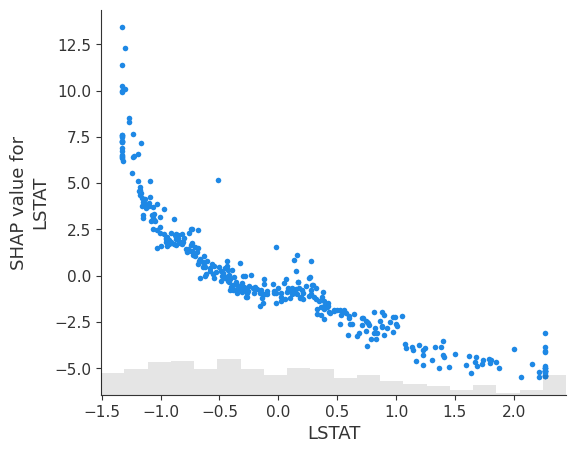

In [38]:
shap.plots.scatter(shap_values[:, 'LSTAT'])

On observe que la valeur de Shapley diminue lorsque la valeur standardisée du pourcentage de la population de statut socio-économique inférieur augmente.

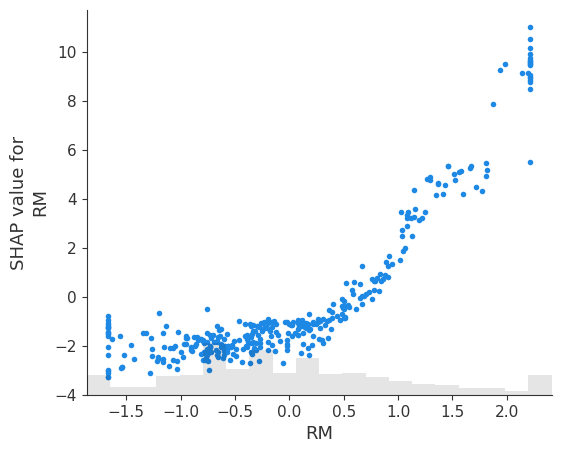

In [60]:
shap.plots.scatter(shap_values[:, 'RM'])

On constate cette fois-ci la valeur de Shapley augmente avec le nombre moyen standardisé de pièces par logement.